In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

sns.set(style="whitegrid")
print("Libraries imported successfully.")


Libraries imported successfully.


In [2]:

df = sns.load_dataset("titanic")
print("Dataset loaded successfully. Shape:", df.shape)
df.head()


Dataset loaded successfully. Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:

# Drop columns not useful for prediction (Feature pruning based on domain knowledge)
drop_cols = ['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone']
df = df.drop(columns=drop_cols, errors='ignore')

# Convert categorical to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# One-hot encode 'embarked'
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

# Drop remaining rows with missing values
df = df.dropna()

print("Cleaned dataset shape:", df.shape)
df.head()


Cleaned dataset shape: (714, 9)


,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [6]:

# جدا کردن ویژگی‌ها (X) و هدف (y)
X = df.drop('survived', axis=1)
y = df['survived']

# تقسیم داده‌ها به آموزش و تست
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (571, 8)
Testing set size: (143, 8)


In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (571, 8)
Testing set size: (143, 8)


In [8]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


In [9]:

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree model trained successfully.")


Decision Tree model trained successfully.


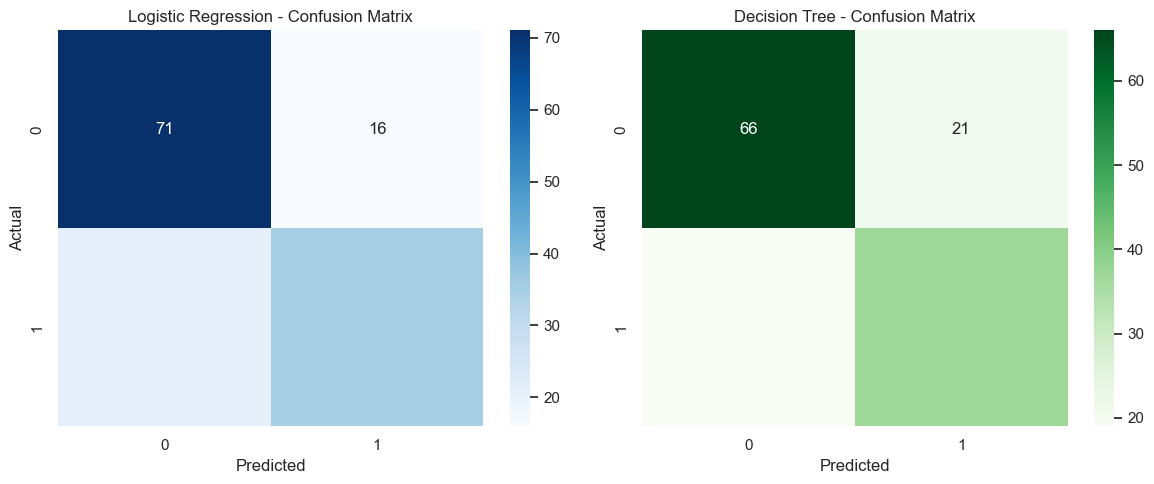

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_log = confusion_matrix(y_test, y_pred_log)
cm_tree = confusion_matrix(y_test, y_pred_tree)

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Decision Tree - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [11]:

# Calculate metrics for both models
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

metrics_log = evaluate_model(y_test, y_pred_log)
metrics_tree = evaluate_model(y_test, y_pred_tree)

comparison = pd.DataFrame([metrics_log, metrics_tree], index=['Logistic Regression', 'Decision Tree'])
comparison


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.741259,0.686275,0.625000,0.654206
Decision Tree,0.720280,0.637931,0.660714,0.649123


In [12]:

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))

print("\n=== Decision Tree ===")
print(classification_report(y_test, y_pred_tree))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        87
           1       0.69      0.62      0.65        56

    accuracy                           0.74       143
   macro avg       0.73      0.72      0.72       143
weighted avg       0.74      0.74      0.74       143


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        87
           1       0.64      0.66      0.65        56

    accuracy                           0.72       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.72      0.72      0.72       143

